In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pprint
import numpy as np

In [2]:
from datetime import datetime

In [3]:
plotly.offline.init_notebook_mode(connected=True)

In [4]:
csv_path = '/Users/pbadami/Documents/njtransit/csv'

In [4]:
csv_path = '/Users/pranav/Documents/development/njtransit/csv'

In [5]:
day = '2018_03_02'

In [6]:
day_df = pd.read_csv('{}/{}.csv'.format(csv_path, day))

In [7]:
day_df[day_df['line'] == 'Gladstone Branch']['from'].unique()

array(['Gladstone', 'Peapack', 'Far Hills', 'Bernardsville',
       'Basking Ridge', 'Lyons', 'Millington', 'Stirling', 'Gillette',
       'Berkeley Heights', 'Murray Hill', 'New Providence', 'Summit',
       'Short Hills', 'Millburn', 'Newark Broad Street', 'Maplewood',
       'South Orange', 'Mountain Station', 'Highland Avenue', 'Orange',
       'Brick Church', 'East Orange', 'Hoboken', 'New York Penn Station'], dtype=object)

In [8]:
nec_list = ['Trenton', 'Hamilton', 'Princeton Junction', 'Jersey Avenue', 'New Brunswick', 'Edison',
             'Metuchen', 'Metropark', 'Rahway', 'Linden', 'Elizabeth', 'North Elizabeth', 'Newark Airport',
             'Newark Penn Station', 'Junction 1', 'Junction 2', 'Secaucus Upper Lvl', 'New York Penn Station']

In [9]:
amtrak_list = ['Philadelphia'] + nec_list

In [10]:
njcl_list = ['Bay Head', 'Point Pleasant Beach', 'Manasquan', 'Spring Lake', 'Belmar', 'Bradley Beach',
             'Asbury Park', 'Allenhurst', 'Elberon', 'Long Branch', 'Monmouth Park', 'Little Silver',
             'Red Bank', 'Middletown NJ', 'Hazlet', 'Aberdeen-Matawan', 'South Amboy', 'Perth Amboy',
             'Woodbridge', 'Avenel', 'Rahway', 'Linden', 'Elizabeth', 'North Elizabeth', 'Newark Airport',
             'Newark Penn Station','Junction 1', 'Junction 2', 'Secaucus Upper Lvl', 'New York Penn Station']
njcl_fork = ['Hoboken']

In [11]:
morristown_list = ['Hackettstown', 'Mount Olive','Netcong','Lake Hopatcong','Mount Arlington','Dover','Denville',
                   'Mount Tabor','Morris Plains','Morristown','Convent Station','Madison','Chatham',
                   'Summit', 'Short Hills','Millburn', 'Maplewood', 'South Orange','Mountain Station', 
                   'Highland Avenue','Orange', 'Brick Church','East Orange','Newark Broad Street', 'Junction 1', 'Junction 2', 'Hoboken']
morristown_fork = ['Secaucus Upper Lvl', 'New York Penn Station']

In [12]:
raritan_list = ['High Bridge', 'Annandale','Lebanon','White House','North Branch','Raritan','Somerville',
                'Bridgewater', 'Bound Brook', 'Dunellen', 'Plainfield', 'Netherwood','Fanwood', 'Westfield',
                'Garwood', 'Cranford', 'Roselle Park', 'Union', 'Newark Penn Station', 'Junction 1', 'Junction 2',
                'Secaucus Upper Lvl', 'New York Penn Station']
raritan_fork = ['Hoboken']

In [13]:
mb_list = ['Hackettstown', 'Mount Olive','Netcong','Lake Hopatcong','Mount Arlington','Dover','Denville',
           'Mountain Lakes', 'Boonton', 'Towaco', 'Lincoln Park','Mountain View','Wayne-Route 23','Little Falls',
           'Montclair State U', 'Montclair Heights', 'Mountain Avenue','Upper Montclair', 'Watchung Avenue',
           'Walnut Street','Bay Street','Glen Ridge','Bloomfield', 'Watsessing Avenue','Newark Broad Street',
           'Junction 1', 'Junction 2', 'Hoboken'] 
mb_fork = ['New York Penn Station', 'Secaucus Upper Lvl']

In [14]:
gladstone_list = ['Gladstone', 'Peapack', 'Far Hills', 'Bernardsville',
                  'Basking Ridge', 'Lyons', 'Millington', 'Stirling', 'Gillette','Berkeley Heights', 'Murray Hill', 
                  'New Providence', 'Summit', 'Short Hills','Millburn', 'Maplewood', 'South Orange',
                  'Mountain Station', 'Highland Avenue','Orange', 'Brick Church','East Orange',
                  'Newark Broad Street', 'Junction 1', 'Junction 2', 'Hoboken']
gladstone_fork = ['Secaucus Upper Lvl', 'New York Penn Station']

In [15]:
def get_linked_dict(line_list):
    linked_dict = {}
    prev_station = None
    next_station = None
    for idx, station in enumerate(line_list):
        if idx < (len(line_list) - 1):
            next_station = line_list[idx + 1]
        else:
            next_station = None
        linked_dict[station] = {-1: [prev_station], 1: [next_station]}
        prev_station = station
    return linked_dict

In [16]:
njcl = get_linked_dict(njcl_list)
njcl['Hoboken'] = {-1: ['Junction 2'], 1: None}
njcl['Junction 2'][1].append('Hoboken')

In [17]:
morristown = get_linked_dict(morristown_list)
morristown['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
morristown['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
morristown['Junction 2'][1].append('Secaucus Upper Lvl')

In [18]:
mb = get_linked_dict(mb_list)
mb['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
mb['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
mb['Junction 2'][1].append('Secaucus Upper Lvl')

In [19]:
gladstone = get_linked_dict(gladstone_list)
gladstone['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
gladstone['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
gladstone['Junction 2'][1].append('Secaucus Upper Lvl')

In [20]:
amtrak = get_linked_dict(amtrak_list)

In [21]:
nec = get_linked_dict(nec_list)

In [22]:
raritan = get_linked_dict(raritan_list)
raritan['Hoboken'] = {-1: ['Junction 2'], 1: None}
raritan['Junction 2'][1].append('Hoboken')

In [23]:
linked_lookup = {'Northeast Corrdr': nec, 
                 'No Jersey Coast': njcl,
                 'Morristown Line': morristown,
                 'Raritan Valley': raritan, 
                 'Montclair-Boonton': mb, 
                 'Gladstone Branch': gladstone,
                 'Amtrak': amtrak}

In [24]:
def clean_delay(sec):
    if sec < 0:
        return 0
    else:
        return sec

# temporarily fix wrong day 
def fix_day(row):
    # wrong day
    if row['delay'] >= (1400*60):
        row['time'] = row['time'] - dt.timedelta(days=1)
        row['delay'] = (row['time'] - row['expected']).total_seconds()
    return row
        
def format_df(df):
    df['expected'] = pd.to_datetime(df['expected'])
    df['time'] = pd.to_datetime(df['time'])

    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df = df.apply(fix_day, axis=1)
    df['delay'] = df['delay'].apply(lambda x: clean_delay(x))/60.0 # clean delay and get delay in minutes
    df['status'] = df['status'].fillna("Estimated")
    return df

In [25]:
df = format_df(day_df)

In [26]:
trains = df.groupby(['train_id', 'date'])

In [27]:
trains_last = trains.last()
trains_first = trains.nth(1)

In [28]:
trains_last['day_of_week'] = trains_last['time'].dt.dayofweek
trains_first['day_of_week'] = trains_first['time'].dt.dayofweek

In [29]:
trains_last['hour'] = trains_last['time'].dt.hour
trains_last['sched_hour'] = trains_last['expected'].dt.hour

trains_first['hour'] = trains_first['time'].dt.hour
trains_first['sched_hour'] = trains_first['expected'].dt.hour

In [30]:
trains_last = trains_last[trains_last['type'] == 'NJ Transit'].copy()
trains_first = trains_first[trains_first['type'] == 'NJ Transit'].copy()

In [31]:
def get_severity(row):
    delay = row['delay']
    status = row['status']
    if status == 'Cancelled':
        return "Cancelled"
    if math.isnan(delay):
        return "Unscheduled"
    if 0 <= delay < 3:
        return "On time"
    if 3 <= delay < 6:
        return "3-5 min"
    if 6 <= delay < 10:
        return "6-9 min"
    if 10 <= delay < 20:
        return "10-20 min"
    return "20+ min"

In [32]:
trains_last['severity'] = trains_last.apply(get_severity, axis=1)
trains_first['severity'] = trains_first.apply(get_severity, axis=1)

In [33]:
trains_last.reset_index(level='date', inplace=True)
trains_first.reset_index(level='date', inplace=True)

In [34]:
# turn into dict
colors={'On time': '#39e600', 
        '3-5 min': '#ffff00', 
        '6-9 min': '#ff9933', 
        '10-20 min': '#ff0000', 
        '20+ min': '#990000', 
        'Cancelled': '#827e7d'}
colors_list= ['#39e600', '#ffff00', '#ff9933', '#ff0000', '#990000', '#827e7d']

In [35]:
len(trains_last)

779

In [36]:
len(trains_first)

779

In [37]:
to_nyp = trains_last[trains_last['to'] == "New York Penn Station"].copy()
from_nyp = trains_first[(trains_first['from'] == "New York Penn Station") & (trains_first['severity'] != 'Unscheduled')].copy()

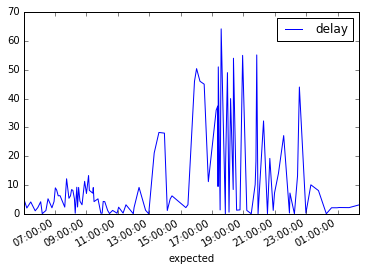

In [38]:
df[(df['from']=='Newark Penn Station') & (df['to']=='Secaucus Upper Lvl')].plot(x='expected', y='delay')

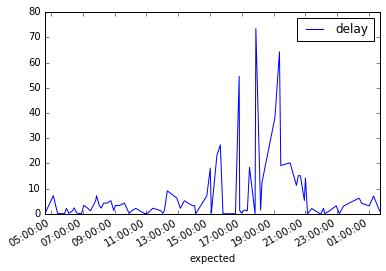

In [39]:
df[(df['from']=='Secaucus Upper Lvl') & (df['to']=='Newark Penn Station')].plot(x='expected', y='delay')

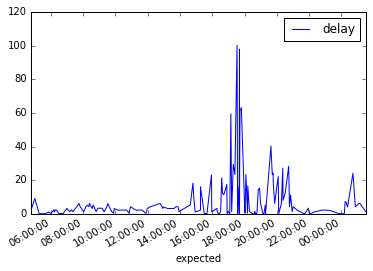

In [40]:
from_nyp.plot(x='expected', y='delay')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ea2b50>]], dtype=object)

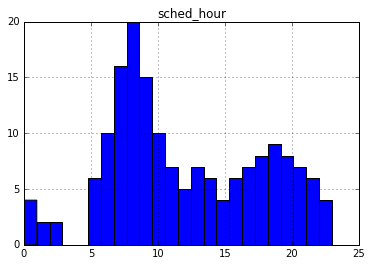

In [41]:
to_nyp.hist('sched_hour', bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11344e1d0>]], dtype=object)

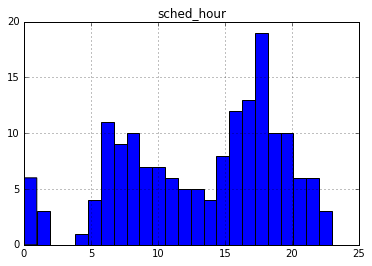

In [42]:
from_nyp.hist('sched_hour', bins=24)

In [43]:
test = to_nyp.copy()
test2 = from_nyp.copy()

In [44]:
test.loc[test['sched_hour'] < 3, 'sched_hour'] = test.loc[test['sched_hour'] < 3, 'sched_hour'] + 24

In [45]:
test2.loc[test2['sched_hour'] < 3, 'sched_hour'] = test2.loc[test2['sched_hour'] < 3, 'sched_hour'] + 24

In [46]:
test['sequence'] = test.sort_values('time').groupby('sched_hour').cumcount() + 1
test2['sequence'] = test2.sort_values('time').groupby('sched_hour').cumcount() + 1

In [47]:
test['severity'].unique()

array(['6-9 min', 'Cancelled', '20+ min', 'On time', '10-20 min', '3-5 min'], dtype=object)

In [48]:
test['severity_color'] = test['severity'].map(colors)
test2['severity_color'] = test2['severity'].map(colors)

In [49]:
test['id'] = test.index
test2['id'] = test2.index

In [50]:
into_cancelled = test[test['severity'] == 'Cancelled'].copy()
into_ontime = test[test['severity'] == 'On time'].copy()
into_3_5 = test[test['severity'] == '3-5 min'].copy()
into_6_9 = test[test['severity'] == '6-9 min'].copy()
into_10_20 = test[test['severity'] == '10-20 min'].copy()
into_20 = test[test['severity'] == '20+ min'].copy()
into_trace = [into_ontime, into_3_5, into_6_9, into_10_20, into_20, into_cancelled]
into_names = ['On time', '3-5 min', '6-9 min', '10-20 min', '20+ min', 'Cancelled']
into_traces = zip(into_trace, into_names)

In [56]:
traces = []
for trace in into_traces:
    trace_data = trace[0]
    trace_name = trace[1]
    traces.append(go.Scatter(
        x = trace_data['sched_hour'],
        y = trace_data['sequence'],
        mode='markers',
        marker=dict(
            size='16',
            color = trace_data['severity_color'], #set color equal to a variable
        ),
        text = trace_data['line'] + trace_data['id'],
        name = trace_name
    ))
layout = go.Layout(
        title='Trains into NY Penn on 3/2/18',
        xaxis=dict(
            title='Hour of day'
        ),
        yaxis=dict(
            ticks='',
            showticklabels=False,
            showgrid=False
        )
    )
fig = go.Figure(data=traces, layout=layout)
plotly.offline.iplot(fig)

In [52]:
out_cancelled = test2[test2['severity'] == 'Cancelled'].copy()
out_ontime = test2[test2['severity'] == 'On time'].copy()
out_3_5 = test2[test2['severity'] == '3-5 min'].copy()
out_6_9 = test2[test2['severity'] == '6-9 min'].copy()
out_10_20 = test2[test2['severity'] == '10-20 min'].copy()
out_20 = test2[test2['severity'] == '20+ min'].copy()
out_trace = [out_ontime, out_3_5, out_6_9, out_10_20, out_20, out_cancelled]
out_names = ['On time', '3-5 min', '6-9 min', '10-20 min', '20+ min', 'Cancelled']
out_traces = zip(out_trace, out_names)

In [55]:
traces = []
for trace in out_traces:
    trace_data = trace[0]
    trace_name = trace[1]
    traces.append(go.Scatter(
        x = trace_data['sched_hour'],
        y = trace_data['sequence'],
        mode='markers',
        marker=dict(
            size='20',
            color = trace_data['severity_color'], #set color equal to a variable
        ),
        text = trace_data['line'] + trace_data['id'],
        name = trace_name
    ))
layout = go.Layout(
        title='Trains out of NY Penn on 3/2/18',
        xaxis=dict(
            title='Hour of day'
        ),
        yaxis=dict(
            ticks='',
            showticklabels=False,
            showgrid=False
        )
    )
fig = go.Figure(data=traces, layout=layout)
plotly.offline.plot(fig)

'file:///Users/pranav/Documents/development/njtransit/notebooks/analysis/temp-plot.html'

# Animation

In [508]:
relevant = ['New York Penn Station', 'Secaucus Upper Lvl', 'Newark Penn Station', 'Newark Airport'] 

In [509]:
relevant_df = df[(df['from'].isin(relevant)) | (df['to'].isin(relevant))].copy()

In [510]:
len(relevant_df)

1556

In [511]:
unique_ids = relevant_df['train_id'].unique()

In [512]:
relevant_df = df[df['train_id'].isin(unique_ids)].copy()

In [513]:
relevant_df['line'].unique()

array(['Raritan Valley', 'No Jersey Coast', 'Morristown Line',
       'Northeast Corrdr', 'ACELA EXPRESS', 'REGIONAL', 'Amtrak',
       'CRESCENT', 'Montclair-Boonton', 'KEYSTONE', 'CAROLINIAN',
       'Gladstone Branch', 'PENNSYLVANIAN', 'SILVER STAR  -R',
       'SILVER METEOR-R', 'VERMONTER    -R', 'AMTRAK'], dtype=object)

In [514]:
except_lines = ['Gladstone Branch', 'Morristown Line', 'Montclair-Boonton']
except_stations = ['Newark Airport', 'Newark Penn Station', 'Secaucus Upper Lvl', 'New York Penn Station', 'Hoboken', 'Newark Broad Street']

In [515]:
stations_except_lines = relevant_df[relevant_df['line'].isin(except_lines)]['from'].unique()

In [516]:
slanted = np.setdiff1d(stations_except_lines, except_stations)

In [517]:
station_map_x = {sta:0 for sta in slanted}
station_map_y = {sta:10 for sta in slanted}

In [518]:
map_x = {'Newark Airport': 0,
        'Newark Broad Street': 5,
        'Newark Penn Station': 5,
        'Secaucus Upper Lvl': 10, 
        'New York Penn Station': 15,
        'Hoboken': 10, 
         'Junction 1':6.5,
         'Junction 2':8
            }
map_y = {'Newark Airport': 0,
        'Newark Broad Street': 5,
         'Newark Penn Station': 0,
         'Secaucus Upper Lvl': 0, 
         'New York Penn Station': 0,
         'Hoboken': -5,
        'Junction 1': 0,
        'Junction 2': 0}

In [519]:
station_map_x.update(map_x)

In [520]:
station_map_y.update(map_y)

In [521]:
relevant_df['from_x'] = relevant_df['from'].map(station_map_x)
relevant_df['to_x'] = relevant_df['to'].map(station_map_x)
relevant_df['from_y'] = relevant_df['from'].map(station_map_y)
relevant_df['to_y'] = relevant_df['to'].map(station_map_y)

In [522]:
relevant_df['from_x'].fillna(0, inplace=True)
relevant_df['to_x'].fillna(0, inplace=True)
relevant_df['from_y'].fillna(0, inplace=True)
relevant_df['to_y'].fillna(0, inplace=True)

In [523]:
def get_direction(group):
    from_x = group.iloc[0]['from_x']
    to_x = group.iloc[-1]['to_x']
    if from_x > to_x:
        group['direction'] = -1
    else:
        group['direction'] = 1
#     print group.iloc[0]['train_id'], from_x, to_x, group.iloc[0]['direction']
    return group

In [524]:
relevant_df = relevant_df.sort_values(['time', 'stop_sequence']).groupby('train_id').apply(get_direction)

In [525]:
cutoff = dt.datetime(2018,3,2,8)
cutoff_end = dt.datetime(2018,3,2,12)

In [526]:
relevant_df = relevant_df[(relevant_df['time'] >= cutoff) & (relevant_df['time'] <= cutoff_end)]

In [527]:
relevant_df = relevant_df[relevant_df['type'] == 'NJ Transit'].copy()

Corrupted NJT trains

In [528]:
corrupted = relevant_df[(relevant_df['from_x'] < relevant_df['to_x']) & (relevant_df['direction'] == -1)]['train_id'].unique()
# corrupted = relevant_df[(relevant_df['from_x'] < relevant_df['to_x']) & (relevant_df['direction'] == -1) & (relevant_df['status'] == 'Departed')]['train_id'].unique()

In [529]:
corrupted_to = relevant_df[(relevant_df['from_x'] > relevant_df['to_x']) & (relevant_df['direction'] == 1)]['train_id'].unique()

In [530]:
corrupted = np.concatenate((corrupted, corrupted_to))

In [531]:
corrupted

array([], dtype=object)

In [532]:
len(corrupted)

0

In [533]:
relevant_df['train_id'].nunique()

114

corrupted trains: 10 am visual (0), 4 pm visual (11 of 105), 10pm visual (3 of 70)

In [534]:
relevant_df = relevant_df[~relevant_df['train_id'].isin(corrupted)].copy()

In [535]:
relevant_df.loc[relevant_df['type'] == 'Amtrak', 'expected'] = relevant_df.loc[relevant_df['type'] == 'Amtrak']['time'].copy()

In [536]:
other_corrupted = ['3957', '3363']

In [537]:
relevant_df = relevant_df[~relevant_df['train_id'].isin(other_corrupted)].copy()

In [538]:
time_df = relevant_df[relevant_df['status'] != 'Cancelled'].copy()
exp_df = relevant_df[(relevant_df['type'] != 'Amtrak') | (relevant_df['status'] != 'Cancelled')].copy()

In [539]:
def get_states(from_state, to_state, linked_dict, direction):
    if to_state == from_state:
        return [to_state]
    if from_state is None:
        return None
    else:
        gap_states = None
        if linked_dict[from_state][direction] is None:
            return gap_states
        for station in linked_dict[from_state][direction]:
            ret = get_states(station, to_state, linked_dict, direction)
            if ret is not None:
                gap_states = [from_state] + ret
        return gap_states

In [540]:
def get_state_movement(states, time_diff, time_start):
    total_dist = 0
    state_info = []
    for from_sta, to_sta in zip(states[:-1], states[1:]):
        if from_sta in station_map_x:
            from_x, from_y = station_map_x[from_sta], station_map_y[from_sta]
        else:
            from_x, from_y = 0, 0
        if to_sta in station_map_x:
            to_x, to_y = station_map_x[to_sta], station_map_y[to_sta]
        else:
            to_x, to_y = 0, 0
        from_loc = np.array((from_x, from_y))
        to_loc = np.array((to_x, to_y))
        dist = np.linalg.norm(to_loc-from_loc)
        if dist:
            total_dist = total_dist + dist
            state_info.append({
                'from': from_sta,
                'to': to_sta,
                'from_x': from_x,
                'from_y': from_y,
                'to_x': to_x,
                'to_y': to_y,
                'dist': dist    
            })
    if total_dist:
        for info in state_info:
            frac = info['dist']/total_dist
            this_diff = time_diff*frac
            info['start'] = time_start
            info['end'] = time_start + dt.timedelta(seconds=this_diff)
            time_start = info['end']
            if not this_diff:
                this_diff = 1
            info['x_delta'] = float(info['to_x'] - info['from_x'])/this_diff
            info['y_delta'] = float(info['to_y'] - info['from_y'])/this_diff
                
    else:
        from_sta = states[0]
        to_sta = states[-1]
        if from_sta in station_map_x:
            from_x, from_y = station_map_x[from_sta], station_map_y[from_sta]
        else:
            from_x, from_y = 0, 0
        if to_sta in station_map_x:
            to_x, to_y = station_map_x[to_sta], station_map_y[to_sta]
        else:
            to_x, to_y = 0, 0
        try:
            state_info = [{'from': from_sta,
                        'to': to_sta,
                        'from_x':  from_x,
                        'from_y':  from_y,
                        'to_x':  to_x,
                        'to_y':  to_y,
                        'dist': total_dist,
                       'start': time_start,
                       'end': time_start + dt.timedelta(seconds=time_diff),
                       'x_delta': 0,
                       'y_delta': 0}]
        except:
            print(time_start, time_diff)
    return state_info

In [541]:
def df_to_positions(input_df, time_col='time'):
    input_df = input_df.copy()
    input_df['from_y'] = input_df['from_y'] + 0.2*input_df['direction']
    input_df['to_y'] = input_df['to_y'] + 0.2*input_df['direction']
    min_time = input_df[time_col].min()
    train_dict = {}
    train_x = []
    train_y = []
    train_text = []
    for index, row in input_df.sort_values(time_col).iterrows():
        t_id = row['train_id']
        if not t_id in train_dict:
            # put first state
            train_dict[t_id] = {}
            train_dict[t_id]['idx'] = len(train_x)
            train_dict[t_id]['start_x'] = row['to_x']
            train_dict[t_id]['start_y'] = row['to_y']
            train_x.append(row['to_x'])
            train_y.append(row['to_y'])
            train_text.append(t_id)
            train_dict[t_id]['state'] = [{'start': min_time,
                                          'end': row[time_col],
                                          'x_delta': 0,
                                          'y_delta': 0}]
            train_dict[t_id]['state_count'] = 0
        else:
            # get states
            prev_state = train_dict[t_id]['state'][-1]
            if row['line'] in linked_lookup:
                linked_dict = linked_lookup[row['line']]
            else:
                linked_dict = linked_lookup['Amtrak']
            gap_states = get_states(row['from'], row['to'], linked_dict, row['direction'])
            if gap_states is not None:            
                time_diff = (row[time_col] - prev_state['end']).total_seconds()
                time_start = prev_state['end']
                state_info = get_state_movement(gap_states, time_diff, time_start)
                train_dict[t_id]['state'] = train_dict[t_id]['state'] + state_info
    return train_dict, train_x, train_y, train_text

In [621]:
def get_frames(input_df, train_dict, train_x, train_y, train_text, time_col='time', exp_col='expected'): 
    # add exp columns
    min_time = min([input_df[time_col].min(), input_df[exp_col].min()])
    current_time = min_time
    max_time = max([input_df[time_col].max(), input_df[exp_col].max()])
    time_step = 60 # seconds
    slider_time_step = 900
    frames = []

    sliders_dict = {
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Time:',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 1000, 'easing': 'linear'},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': []
    }
    
    def calculate_frames(train_dict, train_x, train_y):
        for t_id, train in train_dict.iteritems():
            time_cursor = current_time
            idx = train['idx']
            if not 'completed' in train:
                current_state = train['state_count']
                x_delta = 0
                y_delta = 0
                t = 0
                while time_cursor < animate_to:
                    state = train['state'][current_state]
                    if state['end'] > animate_to:
                        t = animate_to - time_cursor
                    else:
                        t = state['end'] - time_cursor
                        train['state_count'] = train['state_count'] + 1
                        if current_state < (len(train['state']) - 1):
                            current_state = current_state + 1
                        else:
    #                         t = t + (animate_to-time_cursor)
                            time_cursor = animate_to
                            train['completed'] = True
                    x_delta = x_delta + state['x_delta']*t.total_seconds()
                    y_delta = y_delta + state['y_delta']*t.total_seconds()
                    time_cursor = time_cursor + t
                train_x[idx] = train_x[idx] + x_delta
                train_y[idx] = train_y[idx] + y_delta
        return train_dict, train_x, train_y
    times = []
    total_time_step = 0

    while current_time < max_time:
        times.append(current_time)
        animate_to = current_time + dt.timedelta(seconds=time_step)
        
        train_dict, train_x, train_y = calculate_frames(train_dict, train_x, train_y)
        
        slider_step = {'args': [
            [current_time],
            {'frame': {'duration': 700, 'redraw': False},
             'mode': 'immediate',
           'transition': {'duration': 1000, 'easing': 'linear'}}
         ],
         'label': current_time,
         'method': 'animate'}

        current_time = animate_to
        layout = {'annotations': [{'x': 10, 'y': 5, 'text': 'time: ' + current_time.strftime("%I:%M %p")}],
                 }
        frames.append({'data': [{'x': list(train_x), 'y': list(train_y), 'text': train_text}], 
                       'name': str(current_time),
                       'layout': layout})

        total_time_step = total_time_step + time_step
        if not (total_time_step % slider_time_step):
            sliders_dict['steps'].append(slider_step)
    return frames, sliders_dict, times

In [618]:
def plot(frames, sliders_dict, times, title):
    
    figure = {'data': [go.Scatter({'x': [0, 1], 'y': [0, 1], 'type': 'scatter', 'mode':'markers'})],

              'layout': {'xaxis': {'range': [1, 16], 
                                   'autorange': False, 
                                   'scaleanchor': "y",
                                   'ticks':'', 
                                   'showticklabels':False,
                                   'showgrid':False,
                                   'zeroline':False,
                                   'showline':False},
                         'yaxis': {'range': [-6, 6], 
                                   'autorange': False, 
                                   'ticks':'', 
                                   'showticklabels':False,
                                   'showgrid':False,
                                   'zeroline':False,
                                   'showline':False},
                         'title': title,
                         'width': 900,
                         'height': 600,
                         'annotations': [{
                                            'x':10,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'SEC',
                                            'showarrow': False
                                         },
                                         {
                                            'x':2,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':-30,
                                             'ay':0,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':1,
                                            'y':-0.5,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':30,
                                             'ay':0,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':14,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':-30,
                                             'ay':0,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':13,
                                            'y':-0.5,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':30,
                                             'ay':0,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':6,
                                            'y':3,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':-8.6,
                                             'ay':-28.7,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':4.9,
                                            'y':3.8,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':8.6,
                                             'ay':28.7,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':9.9,
                                            'y':-3.8,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':-11.1,
                                             'ay':-27.8,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         {
                                            'x':8.8,
                                            'y':-3,
                                            'xref':'x',
                                            'yref':'y',
                                             'ax':11.1,
                                             'ay':27.78,
                                            'text':'',
                                            'showarrow': True,
                                            'arrowwidth':1,
                                         },
                                         #STATIONS
                                         {
                                            'x':10,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'SEC',
                                            'showarrow': False
                                         },
                                         {
                                            'x':5,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'NWP',
                                            'showarrow': False
                                         }, 
                                         {
                                            'x':15,
                                            'y':0.5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'NYP',
                                            'showarrow': False
                                         }, 
                                         {
                                            'x':5,
                                            'y':5.5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'ND',
                                            'showarrow': False
                                         },
                                         {
                                            'x':11,
                                            'y':-5,
                                            'xref':'x',
                                            'yref':'y',
                                            'text':'HOB',
                                            'showarrow': False
                                         }],

                         'shapes': [
                            # Newark to NY Penn
                            {
                                'type': 'line',
                                'x0': 0,
                                'y0': 0,
                                'x1': 15,
                                'y1': 0,
                                'line': {
                                    'color': 'rgb(255, 0, 0)',
                                    'width': 2,
                                },
                            },
                             # Onward to Newark Broad
                            {
                                'type': 'line',
                                'x0': 0,
                                'y0': 10,
                                'x1': 5,
                                'y1': 5,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                    'width': 2,
                                },
                            },
                            # Newark Broad St to Junction 1
                            {
                                'type': 'line',
                                'x0': 5,
                                'y0': 5,
                                'x1': 6.5,
                                'y1': 0,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                    'width': 2,
                                },
                            },
                            # Junction 2 to Hoboken 
                            {
                                'type': 'line',
                                'x0': 8,
                                'y0': 0,
                                'x1': 10,
                                'y1': -5,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                    'width': 2,
                                },
                            },
                            # Newark Broad Street
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': 4.75,
                                'y0': 4.75,
                                'x1': 5.25,
                                'y1': 5.25,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                },
                            },
                             # Newark Penn
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': 4.75,
                                'y0': -0.25,
                                'x1': 5.25,
                                'y1': 0.25,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                },
                            },
                             # Secaucus
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': 9.75,
                                'y0': -0.25,
                                'x1': 10.25,
                                'y1': 0.25,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                },
                            },
                             # Hoboken
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': 9.75,
                                'y0': -5.25,
                                'x1': 10.25,
                                'y1': -4.75,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                },
                            },
                            # New York Penn
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': 14.75,
                                'y0': 0.25,
                                'x1': 15.25,
                                'y1': -0.25,
                                'line': {
                                    'color': 'rgb(0,0,0)',
                                },
                            },
                             # NEC Beyond
                             {
                                'type': 'circle',
                                'xref': 'x',
                                'yref': 'y',
                                'fillcolor': 'rgb(255,255,255)',
                                'x0': -0.25,
                                'y0': 0.5,
                                'x1': 0.25,
                                'y1': -0.5,
                                'line': {
                                    'color': 'rgb(255,255,255)',
                                }
                            }
                         ]},

                        'frames': frames
                    }
    figure['layout']['sliders'] = {
        'args': [
            'transition', {
                'duration': 1000,
                'easing': 'linear'
            }
        ],
        'initialValue': times[0],
    #     'plotlycommand': 'animate',
        'values': times,
        'visible': True
    }

    figure['layout']['sliders'] = [sliders_dict]
    figure['layout']['updatemenus'] = [
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 700, 'redraw': False},
                             'fromcurrent': True, 'transition': {'duration': 1000, 'easing': 'linear'}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                    'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }
    ]
    plotly.offline.plot(figure)

In [619]:
# plot on 'time' column
time_dict, time_x, time_y, time_text = df_to_positions(time_df)

In [622]:
time_frames, time_sliders, time_times = get_frames(time_df, time_dict, time_x, time_y, time_text)

In [623]:
plot(time_frames, time_sliders, time_times, 'Actual trains between Newark Penn and New York Penn (3/2/18)')

In [607]:
# plot on 'expected' column
exp_dict, exp_x, exp_y, exp_text = df_to_positions(exp_df, time_col='expected')

In [ ]:
exp_frames, exp_sliders, exp_times = get_frames(exp_df, exp_dict, exp_x, exp_y, exp_text)

In [503]:
plot(exp_frames, exp_sliders, exp_times, 'Scheduled trains between Newark Penn and New York Penn (3/2/18)')

In [608]:
# all_frames, all_sliders, all_times = get_frames(time_df, time_dict, time_x, time_y, time_text, 
#                                                 exp_df, exp_dict, exp_x, exp_y, exp_text)

In [616]:
# plot(all_frames, all_sliders, all_times, 'Trains between Newark Penn and New York Penn (3/2/18)')

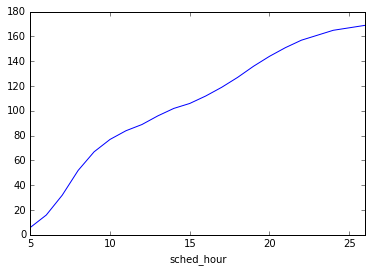

In [306]:
test.groupby('sched_hour').size().cumsum().plot()

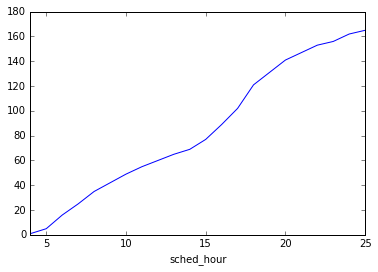

In [309]:
test2.groupby('sched_hour').size().cumsum().plot()

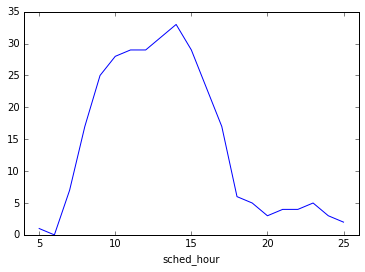

In [311]:
(test.groupby('sched_hour').size().cumsum() - test2.groupby('sched_hour').size().cumsum()).plot()

In [327]:
expected_reserve = (test.groupby(pd.Grouper(key='expected', freq='900s')).size().cumsum() - test2.groupby(pd.Grouper(key='expected', freq='900s')).size().cumsum())


In [333]:
non_cancelled = test[test['status'] != "Cancelled"]

In [360]:
non_cancelled2 = test2[test2['status'] != "Cancelled"]

In [363]:
observed_reserve = (non_cancelled.groupby(pd.Grouper(key='time', freq='900s')).size().cumsum() - test2.groupby(pd.Grouper(key='time', freq='900s')).size().cumsum())

In [507]:
trace0 = go.Scatter(
    x = expected_reserve.index,
    y = expected_reserve.values,
    mode = 'lines',
    name = 'scheduled',
)
trace1 = go.Scatter(
    x = observed_reserve.index,
    y = observed_reserve.values,
    mode = 'lines',
    name = 'actual',
   
)
layout = dict(title = 'Number of Trains Available at New York Penn Station',
              xaxis = dict(title = 'Time of day'),
              yaxis = dict(title = 'Number of trains'),
              shapes = [{
                        'type': 'line',
                        'x0': '2018-03-02 18:30:00',
                        'y0': 35,
                        'x1': '2018-03-02 18:30:00',
                        'y1': -12,
                        'line': {
                            'color': 'rgb(0,0,0)',
                            'width': 2,
                        }}],
              annotations = [{'x': '2018-03-02 21:00:00', 
                              'y': 12, 
                              'text': "6:30 pm:<br>9 trains expected to be availabe,<br>0 trains actually available",
                             'showarrow': False,
                             'align': 'left'},
                             {'x': '2018-03-02 16:45:00', 
                              'y': 13, 
                              'text': "4:00 pm - 5:00 pm:<br>queueing increases availability deficit",
                             'showarrow': True,
                              'ax':-5,
                              'ay':15,
                             'align': 'right',
                             'xanchor':'right',
                            'yanchor':'top'},
                             {'x': '2018-03-02 13:30:00', 
                              'y': 26, 
                              'text': "1:00 pm - 2:00 pm:<br>initial cancellations",
                             'showarrow': True,
                              'ax':-5,
                              'ay':15,
                             'align': 'center',
                             
                            'yanchor':'top'},
                             {'x': '2018-03-02 18:15:00', 
                              'y': 2, 
                              'text': "6:00 pm:<br>further queueing",
                             'showarrow': True,
                              'ax':-5,
                              'ay':15,
                             'align': 'right',
                             'xanchor':'right',
                            'yanchor':'top'}
                        ]
              )
data = [trace0, trace1]
fig = dict(data=data, layout=layout)
plotly.offline.plot(fig)

'file:///Users/pranav/Documents/development/njtransit/notebooks/analysis/temp-plot.html'

In [376]:
observed_reserve[observed_reserve == 0]

time
2018-03-02 18:30:00    0.0
Freq: 900S, dtype: float64

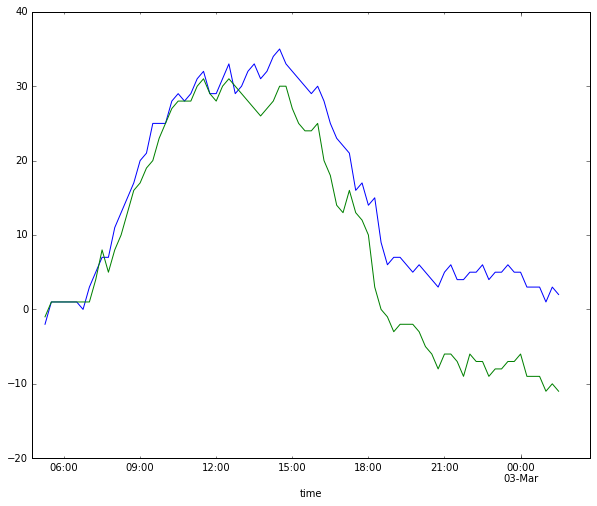

In [364]:
ax = expected_reserve.plot(figsize=(10,8))
observed_reserve.plot(ax=ax)
# (observed_reserve - expected_reserve).plot(ax=ax)

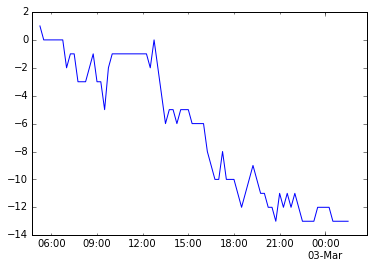

In [355]:
(observed_reserve - expected_reserve).plot()

In [349]:
test[test['hour'] == 18]

,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay,day_of_week,hour,sched_hour,severity,sequence,severity_color,id
train_id,,,,,,,,,,,,,,,,,,,
3260,2018-03-02,17.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 17:28:00,2018-03-02 18:04:00,Estimated,No Jersey Coast,NJ Transit,36.0,4,18,17.0,20+ min,4,#990000,3260
3510,2018-03-02,12.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 17:49:00,2018-03-02 18:50:00,Estimated,No Jersey Coast,NJ Transit,61.0,4,18,17.0,20+ min,7,#990000,3510
3738,2018-03-02,5.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 18:17:00,2018-03-02 18:17:00,Departed,Northeast Corrdr,NJ Transit,0.0,4,18,18.0,On time,2,#39e600,3738
3860,2018-03-02,14.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 17:35:00,2018-03-02 18:10:00,Estimated,Northeast Corrdr,NJ Transit,35.0,4,18,17.0,20+ min,5,#990000,3860
3896,2018-03-02,11.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 17:38:00,2018-03-02 18:29:00,Estimated,Northeast Corrdr,NJ Transit,51.0,4,18,17.0,20+ min,6,#990000,3896
3898,2018-03-02,7.0,Secaucus Upper Lvl,38187,New York Penn Station,105,2018-03-02 18:48:00,2018-03-02 18:48:00,Departed,Northeast Corrdr,NJ Transit,0.0,4,18,18.0,On time,4,#39e600,3898
6664,2018-03-02,16.0,Newark Broad Street,106,New York Penn Station,105,2018-03-02 18:42:00,2018-03-02 18:42:00,Departed,Morristown Line,NJ Transit,0.0,4,18,18.0,On time,3,#39e600,6664


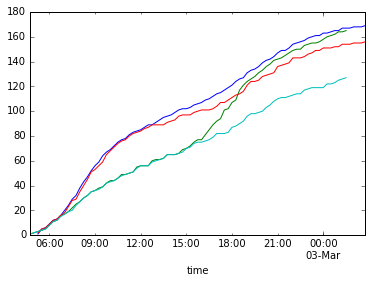

In [365]:
ax = (test.groupby(pd.Grouper(key='expected', freq='900s')).size().cumsum()).plot()
test2.groupby(pd.Grouper(key='expected', freq='900s')).size().cumsum().plot(ax=ax)
(non_cancelled.groupby(pd.Grouper(key='time', freq='900s')).size().cumsum()).plot(ax=ax)
(non_cancelled2.groupby(pd.Grouper(key='time', freq='900s')).size().cumsum()).plot(ax=ax)

In [426]:
test2[test2['status']=="Cancelled"]['time']

train_id
3271   2018-03-02 18:28:24
3281   2018-03-02 20:10:12
3361   2018-03-02 16:57:23
3363   2018-03-02 17:47:23
3373   2018-03-02 18:28:33
3515   2018-03-02 18:39:13
3595   2018-03-02 16:22:14
3721   2018-03-02 16:20:13
3723   2018-03-02 16:53:24
3725   2018-03-02 17:47:24
3737   2018-03-02 21:52:14
3867   2018-03-02 17:32:20
3873   2018-03-02 18:29:16
3889   2018-03-02 21:42:14
3943   2018-03-02 16:21:19
3947   2018-03-02 16:53:21
3951   2018-03-02 17:32:28
3953   2018-03-02 17:33:34
3959   2018-03-02 18:29:25
3961   2018-03-02 18:58:11
6253   2018-03-02 16:20:12
6279   2018-03-02 18:29:07
6283   2018-03-02 19:05:24
6291   2018-03-02 20:04:18
6295   2018-03-02 21:35:15
6299   2018-03-02 23:39:10
6343   2018-03-02 16:36:26
6355   2018-03-02 18:39:25
6359   2018-03-02 19:05:31
6363   2018-03-02 20:04:14
6437   2018-03-02 18:29:12
6639   2018-03-02 15:20:18
6651   2018-03-02 18:29:06
6653   2018-03-02 18:29:06
6655   2018-03-02 19:05:15
6671   2018-03-02 21:05:10
6675   2018-03-02 2